In [1]:
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords,strip_punctuation,preprocess_string,strip_short,stem_text
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirs=["2020-11","2020-12","2021-01","2021-02"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_vader/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 672/672 [00:15<00:00, 42.45it/s] 


In [4]:
data_first_wave = pd.concat(li, axis=0, ignore_index=True)
data_first_wave.head()

,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-10-31 23:59:54+00:00,"Halloween is my favorite holiday, but today th...","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou..."
1,1,2020-10-31 23:59:54+00:00,RT The graphics in this article are excellent-...,"{'neg': 0.075, 'neu': 0.678, 'pos': 0.247, 'co..."
2,2,2020-10-31 23:59:54+00:00,Trick or Treats with my son who I don't see o...,"{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'comp..."
3,3,2020-10-31 23:59:54+00:00,Like Bill Gates and Steve Jobs: Competition in...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
4,4,2020-10-31 23:59:55+00:00,"RT ""Since when have children's clothes been no...","{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp..."


In [5]:
dirs=["2021-12","2022-01"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_vader/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 744/744 [00:15<00:00, 49.18it/s] 


In [6]:
data_second_wave = pd.concat(li, axis=0, ignore_index=True)
data_second_wave.tail()

,Unnamed: 0,created_at,full_text,sentiment_score
227628,167,2022-01-31 22:00:00+00:00,I'm sure you will be covering this and the oth...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp..."
227629,168,2022-01-31 22:00:00+00:00,More like they made her leave because she woul...,"{'neg': 0.086, 'neu': 0.715, 'pos': 0.2, 'comp..."
227630,169,2022-01-31 22:00:00+00:00,"RT My wise and funny Dad, Ranjith Chandrapala,...","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
227631,170,2022-01-31 22:00:00+00:00,Thank you for attending the webinar for #journ...,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
227632,171,2022-01-31 22:00:00+00:00,RT Thanks to everyone who's bought a copy of T...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."


In [7]:
data_first_wave=data_first_wave.drop('Unnamed: 0',axis=1)
data_second_wave=data_second_wave.drop('Unnamed: 0',axis=1)

In [8]:
print(data_first_wave.shape)
data_first_wave = data_first_wave[data_first_wave['full_text'].notna()]
data_first_wave.shape

(433347, 3)


(433339, 3)

In [9]:
print(data_second_wave.shape)
data_second_wave = data_second_wave[data_second_wave['full_text'].notna()]
data_second_wave.shape

(227633, 3)


(227631, 3)

In [10]:
def preprocess(text):
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short]
    text = preprocess_string(text, CUSTOM_FILTERS)
    
    return text
 
data_first_wave['clean_text'] = data_first_wave['full_text'].apply(lambda x: preprocess(x))
data_second_wave['clean_text'] = data_second_wave['full_text'].apply(lambda x: preprocess(x))

In [11]:
corpus_first_wave = data_first_wave['clean_text']
lexicon_first_wave = corpora.Dictionary(corpus_first_wave)
bow_first_wave = [lexicon_first_wave.doc2bow(text) for text in corpus_first_wave]

corpus_second_wave = data_second_wave['clean_text']
lexicon_second_wave = corpora.Dictionary(corpus_second_wave)
bow_second_wave = [lexicon_second_wave.doc2bow(text) for text in corpus_second_wave]

In [12]:
for i in range(2,13):
    lsi_first_wave = LsiModel(bow_first_wave, num_topics=i, id2word=lexicon_first_wave)
    coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='u_mass')
    coherence_score_first_wave = coherence_model_first_wave.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_first_wave))

Coherence score with 2 clusters: -3.304821962415255
Coherence score with 3 clusters: -3.6429147790843026
Coherence score with 4 clusters: -3.637376532861401
Coherence score with 5 clusters: -3.8574842968261565
Coherence score with 6 clusters: -3.9529757826994882
Coherence score with 7 clusters: -3.819808245254144
Coherence score with 8 clusters: -3.981592015668787
Coherence score with 9 clusters: -4.244572605122157
Coherence score with 10 clusters: -4.552002559760102
Coherence score with 11 clusters: -4.158401376187478
Coherence score with 12 clusters: -4.127091737888659


In [13]:
lsi_first_wave = LsiModel(bow_first_wave, num_topics=10, id2word=lexicon_first_wave)

In [14]:
text_first_wave=""
for topic_num, words in lsi_first_wave.print_topics(num_words=5):
    t_list=words.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    if "https" in t_list:
      t_list.remove('https')
    text_first_wave+=" ".join(t_list)
    text_first_wave+=" "
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.912*"covid" + 0.143*"https" + 0.114*"vaccine" + 0.113*"people" + 0.107*"pandemic".
Words in 1: 0.753*"pandemic" + -0.304*"covid" + 0.262*"https" + 0.212*"covid19" + 0.194*"people".
Words in 2: 0.561*"pandemic" + -0.398*"covid19" + -0.351*"https" + -0.279*"coronavirus" + -0.262*"new".
Words in 3: 0.655*"people" + 0.423*"amp" + -0.305*"https" + -0.214*"cases" + -0.208*"pandemic".
Words in 4: 0.431*"https" + -0.401*"cases" + -0.383*"people" + 0.369*"amp" + -0.271*"new".
Words in 5: 0.659*"amp" + -0.441*"people" + -0.421*"https" + 0.192*"cases" + -0.170*"vaccine".
Words in 6: 0.740*"lockdown" + -0.418*"vaccine" + -0.350*"covid19" + 0.228*"https" + -0.135*"coronavirus".
Words in 7: 0.394*"new" + -0.365*"https" + -0.341*"000000" + -0.238*"wind" + -0.196*"amp".
Words in 8: 0.412*"mask" + 0.362*"wear" + 0.338*"covid19" + -0.291*"amp" + -0.278*"new".
Words in 9: 0.485*"vaccine" + -0.464*"covid19" + 0.444*"coronavirus" + 0.342*"trump" + 0.177*"lockdown".


In [15]:
coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='u_mass')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('UMass Coherence score with {} clusters: {}'.format(10, coherence_score_first_wave))

coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='c_v')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('CV Coherence score with {} clusters: {}'.format(10, coherence_score_first_wave))

coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='c_uci')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('UCI Coherence score with {} clusters: {}'.format(10, coherence_score_first_wave))

UMass Coherence score with 10 clusters: -4.454721728954944
CV Coherence score with 10 clusters: 0.30368532519093716
UCI Coherence score with 10 clusters: -0.9353867443134822


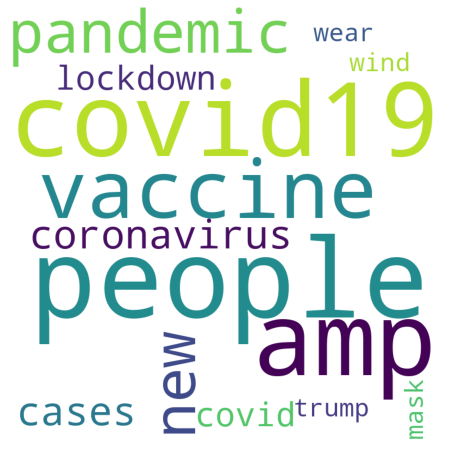

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_first_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
for i in range(2,10):
    lsi_second_wave = LsiModel(bow_second_wave, num_topics=i, id2word=lexicon_second_wave)
    coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='u_mass')
    coherence_score_second_wave = coherence_model_second_wave.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_second_wave))

Coherence score with 2 clusters: -3.3718531115653843
Coherence score with 3 clusters: -3.685514588433257
Coherence score with 4 clusters: -3.6306996619408425
Coherence score with 5 clusters: -3.6112947261892914
Coherence score with 6 clusters: -3.622574168459878
Coherence score with 7 clusters: -3.9059047328778322
Coherence score with 8 clusters: -3.9757426639349127
Coherence score with 9 clusters: -3.759366806492634


In [18]:
lsi_second_wave = LsiModel(bow_second_wave, num_topics=8, id2word=lexicon_second_wave)

In [19]:
text_second_wave=""
for topic_num, words in lsi_second_wave.print_topics(num_words=5):
    t_list=words.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    if "https" in t_list:
      t_list.remove('https')
    text_second_wave+=" ".join(t_list)
    text_second_wave+=" "
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.924*"covid" + 0.117*"https" + 0.115*"people" + 0.101*"vaccine" + 0.087*"new".
Words in 1: 0.519*"vaccine" + 0.384*"omicron" + -0.319*"covid" + 0.290*"https" + 0.288*"pandemic".
Words in 2: 0.747*"vaccine" + -0.377*"omicron" + -0.264*"pandemic" + -0.227*"new" + -0.225*"https".
Words in 3: 0.675*"pandemic" + -0.423*"omicron" + 0.398*"people" + -0.197*"cases" + -0.176*"vaccine".
Words in 4: 0.741*"people" + -0.391*"pandemic" + -0.357*"https" + 0.267*"omicron" + -0.189*"vaccine".
Words in 5: 0.897*"amp" + -0.273*"https" + -0.271*"people" + -0.076*"pandemic" + 0.062*"omicron".
Words in 6: 0.661*"https" + -0.535*"new" + -0.332*"cases" + -0.212*"pandemic" + 0.138*"amp".
Words in 7: -0.542*"omicron" + 0.404*"new" + 0.377*"https" + -0.327*"pandemic" + 0.249*"cases".


In [20]:
coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='u_mass')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('UMass Coherence score with {} clusters: {}'.format(8, coherence_score_second_wave))

coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='c_v')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('CV Coherence score with {} clusters: {}'.format(8, coherence_score_second_wave))

coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='c_uci')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('UCI Coherence score with {} clusters: {}'.format(8, coherence_score_second_wave))

UMass Coherence score with 8 clusters: -3.967405641558525
CV Coherence score with 8 clusters: 0.2848329043426807
UCI Coherence score with 8 clusters: -0.3471763050254365


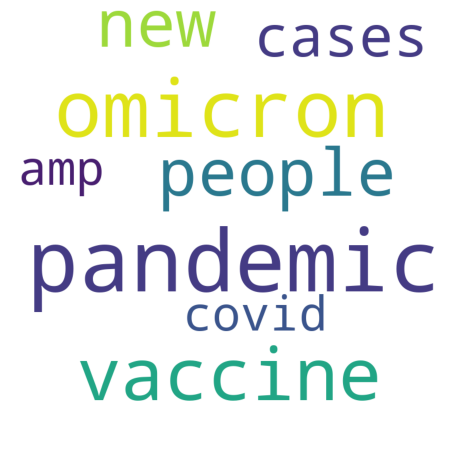

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_second_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()